In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data from source
PATH = 'https://raw.githubusercontent.com/nhanphan0411/cs-dataset/main/OnlineRetail.csv'
tx_data = pd.read_csv(PATH,encoding = "ISO-8859-1")

In [3]:
# Preview the data
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# How many rows and columns do we have in the data?
tx_data.shape

(541909, 8)

In [5]:
# Get dataset information
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Check and drop duplicated (if any)
tx_data.duplicated().sum()

5268

In [7]:
# Check for NaN values
tx_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# What is the percentage of the number of NaN values compared to the whole data?
tx_data.isna().sum() / tx_data.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

We'll leave the NaN values as they are for now, and will take action toward to it when we need to use it.

In [9]:
# Adjust column InvoiceDate to datetime datatype
tx_data['InvoiceDate'] = pd.to_datetime(tx_data["InvoiceDate"])

In [10]:
# Extract year-month for further analysis
tx_data['InvoiceYearMonth'] = tx_data["InvoiceDate"].dt.to_period("M")

In [11]:
# Your result should look like this
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [12]:
# In what month-year was the FIRST transaction recorded?
tx_data["InvoiceYearMonth"].min()

Period('2010-12', 'M')

In [13]:
# In what month-year was the LAST transaction recorded?
tx_data["InvoiceYearMonth"].max()

Period('2011-12', 'M')

The data in December 2011 is incomplete so we are not using this month's data in this analysis.

In [14]:
# Filter out 2011-12 data
tx_data = tx_data[tx_data["InvoiceYearMonth"]!="2011-12"]

#2. Analyse Revenue

In [15]:
# Compute the Revenue column by UnitPrice * Quantity
tx_data['Revenue'] = tx_data["UnitPrice"] * tx_data["Quantity"]

In [16]:
# Get Total Revenue of each month
tx_revenue = tx_data.groupby("InvoiceYearMonth")["Revenue"].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


<Axes: xlabel='InvoiceYearMonth', ylabel='Revenue'>

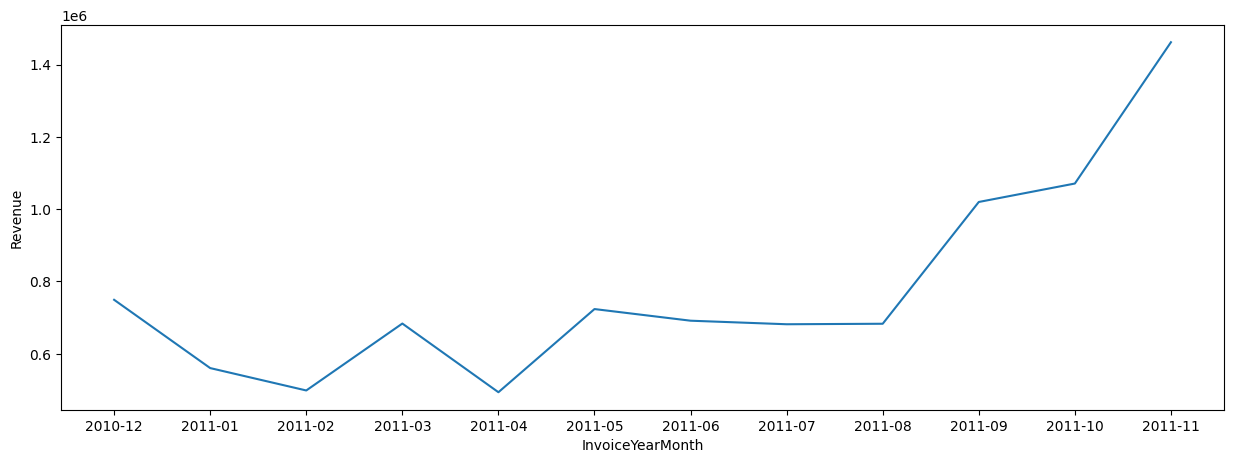

In [17]:
# ❗️Tip: If you use Seaborn for plotting, convert Invoice Year Month into string first.
tx_revenue['InvoiceYearMonth'] = tx_revenue['InvoiceYearMonth'].astype('string')

# Plot the revenue by month
plt.figure(figsize=(15,5))
sns.lineplot(data=tx_revenue, x="InvoiceYearMonth",y="Revenue")

🙋🏻‍♂️ **DISCUSSION: What can you observe from the chart?**

Apart from the absolute metrics, we should also take a look at the relative change of revenue throughout time.

To compute the revenue growth of one month compared to the previous one, we can use `.pct_change()`

In [18]:
# Compute the change overtime using .pct_change()
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

In [19]:
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,2010-12,748957.020,NaN
1,2011-01,560000.260,-0.252293
2,2011-02,498062.650,-0.110603
3,2011-03,683267.080,0.371850
4,2011-04,493207.121,-0.278163


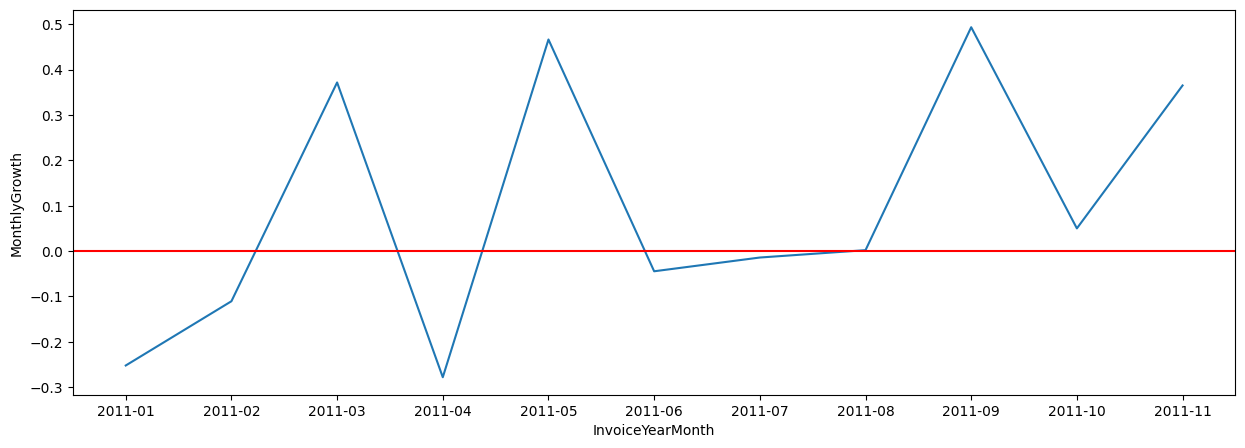

In [20]:
# Plot the month growth
plt.figure(figsize=(15,5))
sns.lineplot(data=tx_revenue, x="InvoiceYearMonth",y="MonthlyGrowth")
plt.axhline(y=0, color = "red")

In [21]:
tx_data["Revenue"].describe()

count    516384.000000
mean         18.037120
std         198.783495
min      -77183.600000
25%           3.400000
50%           9.840000
75%          17.400000
max       77183.600000
Name: Revenue, dtype: float64

In [22]:
tx_data[tx_data["Revenue"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,-6.96
...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11,-0.85
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11,-3.29
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11,-1.25
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11,-7.95


In [23]:
tx_data[
    (tx_data["StockCode"] == "35004C") & (tx_data["CustomerID"] == 15311.0)
].sort_values("InvoiceDate")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12,-4.65
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311.0,United Kingdom,2010-12,55.80
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311.0,United Kingdom,2010-12,-4.65
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311.0,United Kingdom,2010-12,55.80
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311.0,United Kingdom,2010-12,-13.95
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311.0,United Kingdom,2011-01,55.80
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311.0,United Kingdom,2011-01,55.80
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311.0,United Kingdom,2011-02,-9.30


### Where is the main market of the store?


In [24]:
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [25]:
# Plot the Total Revenue by Country
plot_data = tx_data.groupby("Country")["Revenue"].sum().reset_index()
plot_data

,Country,Revenue
0,Australia,137077.270
1,Austria,9471.120
2,Bahrain,548.400
3,Belgium,39501.530
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,19892.140
7,Cyprus,13037.540
8,Czech Republic,707.720
9,Denmark,18599.240


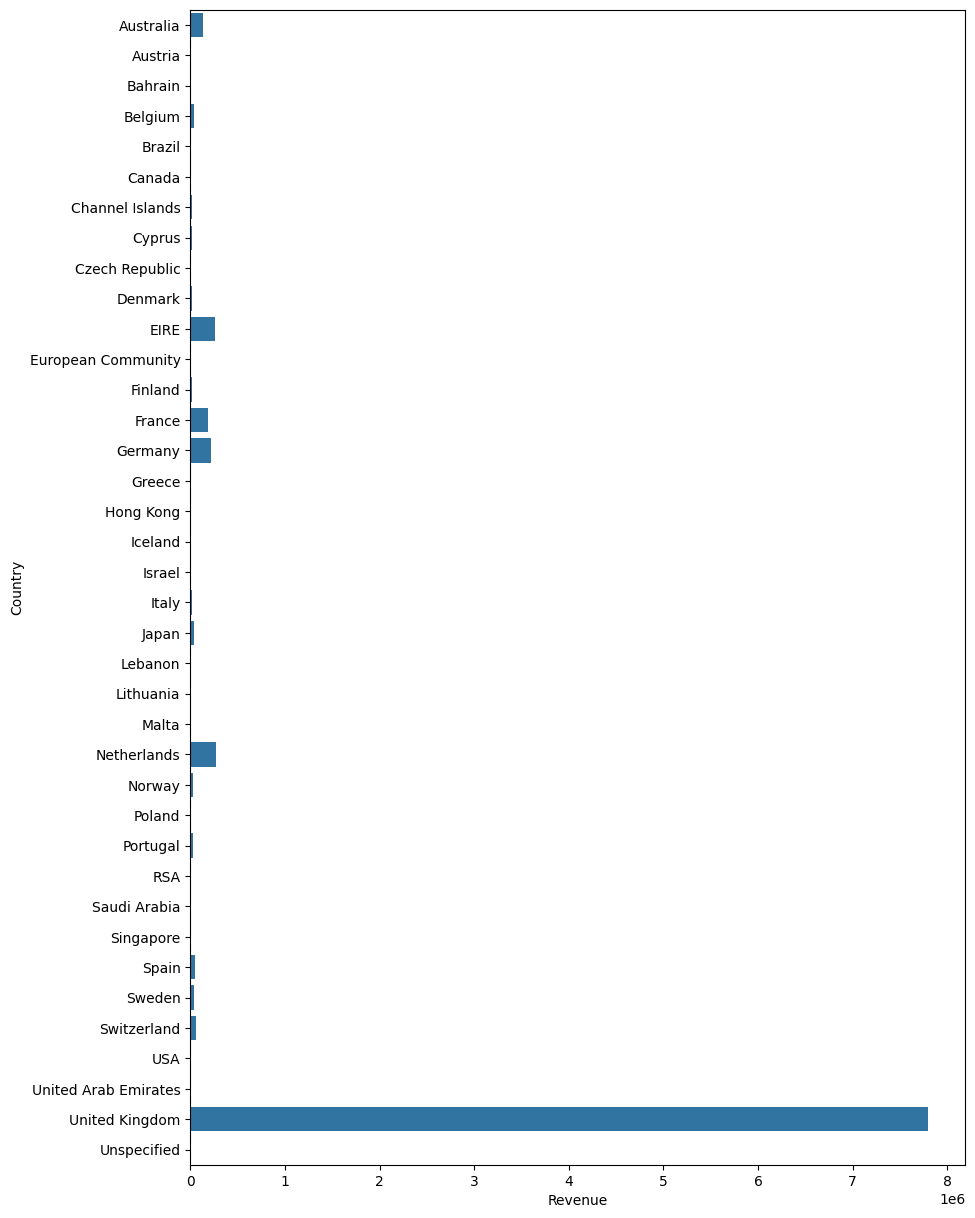

In [26]:
plt.figure(figsize=(10,15))
sns.barplot(data=plot_data,x="Revenue", y="Country")
plt.show()

We can see clearly that UK is the dominant market of this online retailer. In this report, we will focus on the UK market only to have a better specific insight.

In [27]:
# Filter out data in UK only
tx_uk = tx_data[tx_data['Country'] == 'United Kingdom'].reset_index(drop=True)
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


**From now on, we use tx_uk as the main dataframe for analysis!**

# 3. Analyse Growth of Customer and Retention Rate

## 3.1 / Active Customer

In [28]:
# Calculate number of unique customers each month
tx_monthly_active = (tx_uk.groupby("InvoiceYearMonth")["CustomerID"].nunique().reset_index())
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,2010-12,871
1,2011-01,684
2,2011-02,714
3,2011-03,923
4,2011-04,817
5,2011-05,985
6,2011-06,943
7,2011-07,899
8,2011-08,867
9,2011-09,1177


<Axes: xlabel='InvoiceYearMonth', ylabel='CustomerID'>

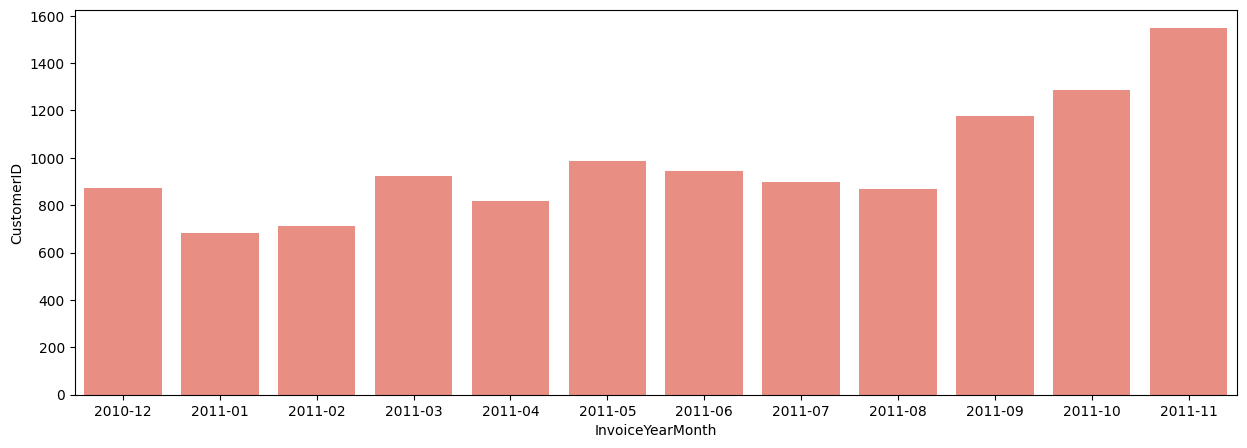

In [29]:
# Plot the number of unique customer by YearMonth
plt.figure(figsize=(15,5))
sns.barplot(data=tx_monthly_active, x="InvoiceYearMonth", y="CustomerID", color = "salmon")

🙋🏻‍♂️ **DISCUSSION: What can you observe from the chart?**

## 3.2 / New Customer by Time

🙋🏻‍♂️ **DISCUSSION: Look into the data entry, how can we know if the customer is a new customer or a returning one?**

In [30]:
# Get the first transaction of each customer
tx_min_purchase = tx_uk.groupby("CustomerID")["InvoiceDate"].min().reset_index()
tx_min_purchase

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3911,18280.0,2011-03-07 09:52:00
3912,18281.0,2011-06-12 10:53:00
3913,18282.0,2011-08-05 13:35:00
3914,18283.0,2011-01-06 14:14:00


In [31]:
# Convert the column to Year-Month format and change the column name
tx_min_purchase["InvoiceDate"] = tx_min_purchase["InvoiceDate"].dt.to_period("M")
tx_min_purchase.columns = ["CustomerID","MinPurchaseYearMonth"]
tx_min_purchase

,CustomerID,MinPurchaseYearMonth
0,12346.0,2011-01
1,12747.0,2010-12
2,12748.0,2010-12
3,12749.0,2011-05
4,12820.0,2011-01
...,...,...
3911,18280.0,2011-03
3912,18281.0,2011-06
3913,18282.0,2011-08
3914,18283.0,2011-01


In [32]:
# Merge the tx_min_purchase table with the main one tx_uk
pd.merge(tx_uk, tx_min_purchase, on="CustomerID", how="inner")
tx_uk = pd.merge(tx_uk, tx_min_purchase, on="CustomerID", how="inner")
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12


In [33]:
tx_uk.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
InvoiceYearMonth        0
Revenue                 0
MinPurchaseYearMonth    0
dtype: int64

In [34]:
# Compute a new column named UserType that
# If the transaction has InvoiceYearMonth = MinPurchaseYearMonth --> New
# If the transaction has InvoiceYearMonth > MinPurchaseYearMonth --> Existing
def check_type(row):
    if row["InvoiceYearMonth"] == row["MinPurchaseYearMonth"]:
        return "New"
    elif row["InvoiceYearMonth"] > row["MinPurchaseYearMonth"]:
        return "Existing"
tx_uk["UserType"] = tx_uk[["InvoiceYearMonth","MinPurchaseYearMonth"]].apply(check_type,axis=1)
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12,New


In [35]:
tx_uk.loc[
    tx_uk["InvoiceYearMonth"] > tx_uk["MinPurchaseYearMonth"], "UserType"
] = "Existing"

In [36]:
# You should have the same return as this one when running .value_counts()
tx_uk['UserType'].value_counts()

UserType
Existing    240890
New         104911
Name: count, dtype: int64

Compared to the number of existing customer, the number of new customer declined steadily since Jan 2011 but start to pick up again recently.

In [37]:
# Compute the number of UNIQUE NEW customers by year-month.
new_customer_by_time = (tx_uk[tx_uk["UserType"]=="New"].groupby("InvoiceYearMonth")["CustomerID"].nunique())
new_customer_by_time

InvoiceYearMonth
2010-12    871
2011-01    362
2011-02    339
2011-03    408
2011-04    276
2011-05    252
2011-06    207
2011-07    172
2011-08    140
2011-09    275
2011-10    318
2011-11    296
Freq: M, Name: CustomerID, dtype: int64

In [38]:
# Compute the number of UNIQUE EXISTING customers by year-month.
existing_customer_by_time = (tx_uk[tx_uk["UserType"]=="Existing"].groupby("InvoiceYearMonth")["CustomerID"].nunique())
existing_customer_by_time

InvoiceYearMonth
2011-01     322
2011-02     375
2011-03     515
2011-04     541
2011-05     733
2011-06     736
2011-07     727
2011-08     727
2011-09     902
2011-10     967
2011-11    1252
Freq: M, Name: CustomerID, dtype: int64

In [39]:
# From the two tables above, compute the ratio of unique new customers / unique existing customers by year-month
tx_user_ratio = new_customer_by_time / existing_customer_by_time

In [40]:
# You should get ther same result as this
tx_user_ratio = new_customer_by_time / existing_customer_by_time
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio.columns = ["InvoiceYearMonth", "UserTypeRatio"]
tx_user_ratio


,InvoiceYearMonth,UserTypeRatio
0,2010-12,NaN
1,2011-01,1.124224
2,2011-02,0.904000
3,2011-03,0.792233
4,2011-04,0.510166
5,2011-05,0.343793
6,2011-06,0.281250
7,2011-07,0.236589
8,2011-08,0.192572
9,2011-09,0.304878


🙋🏻‍♂️ **DISCUSSION: Why is there a NaN value at the first row?**

In [41]:
tx_user_ratio = tx_user_ratio.dropna()

Text(0.5, 0, 'Time')

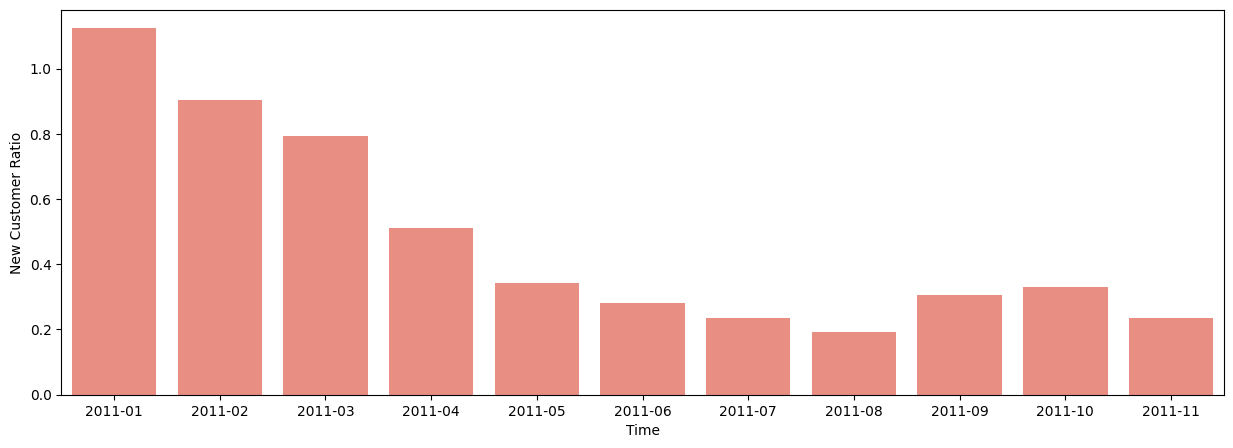

In [42]:
# Visualize the table above with a bar chart
# YOUR CODE HERE

plt.figure(figsize=(15,5))
sns.barplot(data= tx_user_ratio, x="InvoiceYearMonth", y="UserTypeRatio",color="salmon")
plt.ylabel("New Customer Ratio")
plt.xlabel("Time")

## 3.3 / Revenue Made By New vs Existing Users

In [43]:
# Compute the Total Revenue by Year-Month and UserType
tx_user_type_revenue = tx_uk.groupby(["InvoiceYearMonth","UserType"])["Revenue"].sum().reset_index()
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
0,2010-12,New,483799.740
1,2011-01,Existing,195275.510
2,2011-01,New,156705.770
3,2011-02,Existing,220994.630
4,2011-02,New,127859.000
5,2011-03,Existing,296350.030
6,2011-03,New,160567.840
7,2011-04,Existing,268226.660
8,2011-04,New,108517.751
9,2011-05,Existing,434725.860


<Axes: xlabel='InvoiceYearMonth', ylabel='Revenue'>

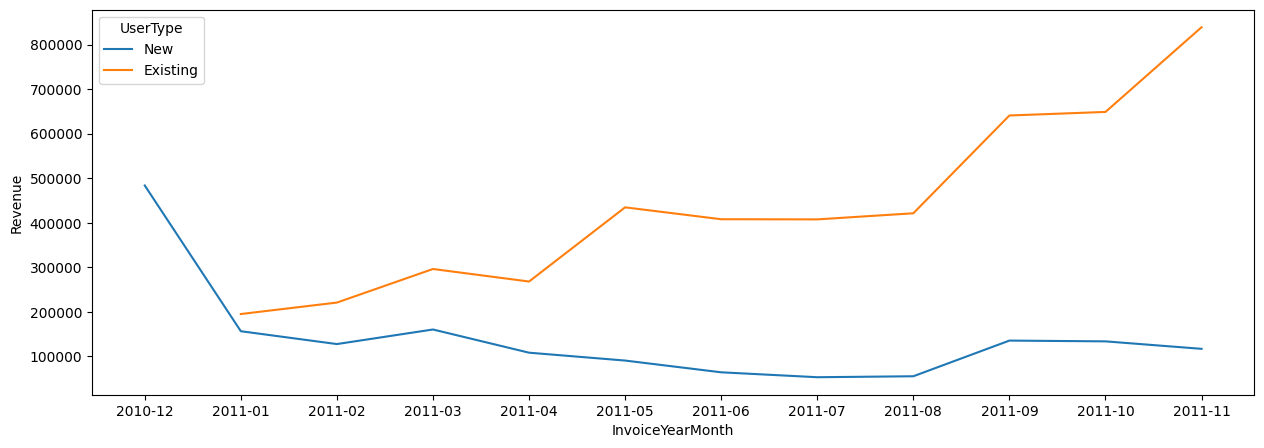

In [44]:
# Visualize the dataframe above with a line chart
# ❗️Tip: If you use Seaborn for plotting, convert Invoice Year Month into string first.
tx_user_type_revenue['InvoiceYearMonth'] = tx_user_type_revenue['InvoiceYearMonth'].astype('string')

plt.figure(figsize=(15,5))
sns.lineplot(data=tx_user_type_revenue, x="InvoiceYearMonth",y="Revenue", hue="UserType")

🙋🏻‍♂️ **DISCUSSION: What can we intepret from this graph?**

## 3.4 / Monthly Retention Rate

In [ ]:
# Preview the data from UK one more time
tx_uk.drop(columns= ["MinPurchaseYearMonth_x","MinPurchaseYearMonth_y"],inplace=True)
tx_uk.head()

In [ ]:
# Calculate revenue made by each CustomerID each month
tx_user_purchase = (tx_uk.groupby(["CustomerID","InvoiceYearMonth"])["Revenue"].sum().reset_index())
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,2011-01,0.00
1,12747.0,2010-12,706.27
2,12747.0,2011-01,303.04
3,12747.0,2011-03,310.78
4,12747.0,2011-05,771.31
...,...,...,...
11708,18283.0,2011-09,134.90
11709,18283.0,2011-10,114.65
11710,18283.0,2011-11,651.56
11711,18287.0,2011-05,765.28


In [ ]:
tx_uk[tx_uk["CustomerID"]==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,UserType,MinPurchaseYearMonth
172108,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01,77183.6,New,2011-01
172109,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01,-77183.6,New,2011-01


Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

`Monthly Retention Rate = Retained Customers From Prev. Month / Active Customers Total`

First, we use `pivot_table()` on `tx_user_purchase` to COUNT how many transactions each customer made in each month. Notice that:

- parameter `aggfunc=len` is used to return the count of transactions that the customer made in each month.
- parameter `fill_value=0` to fill all the NaN with 0.

In [ ]:
tx_retention = pd.pivot_table(data= tx_user_purchase,
                              index="CustomerID",
                              values= "Revenue",
                              columns="InvoiceYearMonth",
                              aggfunc =len,
                              fill_value=0)
tx_retention

InvoiceYearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0


`<dataframe>.T` will tranpose your table. Notice that the columns are now rows and rows are columns.

In [ ]:
tx_retention = tx_retention.T
tx_retention

InvoiceYearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0


The table shows how many transaction one customer made in a specific month. There is no customer that made more than 1 transaction per month. In an easy word, customer who 'retains' (means that the customer comes back to buy again this month) will have 1 in the current month and also 1 in the previous month.

So we can spot them, by taking the data of two months and sum them. If the sum >= 2, that customer returns.

In [ ]:
# For example, calculate the number of retained customers of 2011-01
data_2011_01 = tx_retention.iloc[1] # This month
data_2010_12 = tx_retention.iloc[0] # Last month

# Total number of customers of this month
total_2011_01 = tx_retention.iloc[1].sum()

# Total number of RETAINED customers of this month
retention_2011_01 = ((data_2011_01 + data_2010_12) == 2).sum()
retention_2011_01

1

In [ ]:
#@title Solution -- Try to work it your way first. Open this if you really stuck.

months = tx_retention.index

retention_array = []
for i in range(1, 12):
    retention_data = {}
    retention_data['InvoiceYearMonth'] = months[i]
    retention_data['RetainedUserCount'] = ((tx_retention.iloc[i] + tx_retention.iloc[i-1]) == 2).sum()
    retention_data['TotalCount'] = tx_retention.iloc[i].sum()
    retention_array.append(retention_data)

tx_retention_count = pd.DataFrame(retention_array)
tx_retention_count.head()

,InvoiceYearMonth,RetainedUserCount,TotalCount
0,12747.0,1,8
1,12748.0,8,12
2,12749.0,3,3
3,12820.0,0,3
4,12821.0,0,1


In [ ]:
# Compute the retention rate column
tx_retention_count['RetentionRate'] = tx_retention_count['RetainedUserCount'] / tx_retention_count['TotalCount']
tx_retention_count

,InvoiceYearMonth,RetainedUserCount,TotalCount,RetentionRate
0,12747.0,1,8,0.125000
1,12748.0,8,12,0.666667
2,12749.0,3,3,1.000000
3,12820.0,0,3,0.000000
4,12821.0,0,1,0.000000
5,12822.0,0,1,0.000000
6,12823.0,1,4,0.250000
7,12824.0,0,1,0.000000
8,12826.0,0,5,0.000000
9,12827.0,1,2,0.500000


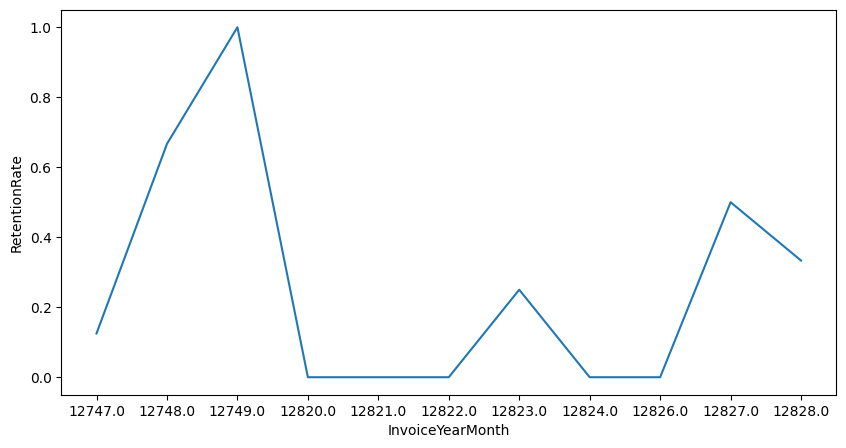

In [ ]:
# Plot the Retention Rate by Time
tx_retention_count['InvoiceYearMonth'] = tx_retention_count['InvoiceYearMonth'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=tx_retention_count, x='InvoiceYearMonth', y='RetentionRate')
plt.show()

#4. Export to Google Sheet Report and Design a Tableau Dashboard

In [ ]:
# Mount to Google Sheets
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.  

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('example') # Thay bằng tên spreadsheet của các bạn

Tables to export:
- `tx_revenue` to sheet0: Overall Revenue Report
- `tx_country` to sheet1: Revenue by Country
- `tx_monthly_active` to sheet2: Active Users in UK
- `tx_user_ratio` to sheet3: Ratio of Number of New Customers / Existing Customers
- `tx_user_type_revenue` to sheet4: Ratio of Revenue by New Customers / Existing Customers
- `tx_retention_count` to sheet5: Retention Rate by Month

In [ ]:
tx_revenue.head()

In [ ]:
tx_country = tx_data.groupby('Country')['Revenue'].sum().reset_index()
tx_country

In [ ]:
# tx_revenue
# tx_monthly_active
# tx_user_ratio
# tx_user_type_revenue
# tx_retention_count

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ...
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)

    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key

export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'revenue', tx_revenue)
export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'revenueByCountry', tx_country)
export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'activeUsers', tx_monthly_active)
export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'newUsersRate', tx_user_ratio)
export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'revenueByUsers', tx_user_type_revenue)
export_data_to_new_sheet('17xXULPS5CdnqGHWXRvWXhtXcl4a4zPeqJzJyem9eOs0', 'retention', tx_retention)

Dashboard at: https://public.tableau.com/app/profile/nguyen.thuc/viz/UkRetailSample_17008067508680/Dashboard1?publish=yes